本文主要介绍GeoPandas结合matplotlib实现地图的基础可视化。GeoPandas是一个Python开源项目，旨在提供丰富而简单的地理空间数据处理接口。GeoPandas扩展了Pandas的数据类型，并使用matplotlib进行绘图。GeoPandas官方仓库地址为：[GeoPandas](https://github.com/geopandas/geopandas)。GeoPandas的官方文档地址为：[GeoPandas-doc](https://geopandas.org/en/stable/docs.html)。关于GeoPandas的使用见[[数据分析与可视化] Python绘制数据地图1-GeoPandas入门指北](https://blog.csdn.net/LuohenYJ/article/details/129596398)。

GeoPandas推荐使用Python3.7版本及以上，运行环境最好是linux系统。GeoPandas安装命令如下：

> pip install geopandas

如果上述命令安装出问题，则推荐使用conda安装GeoPandas，命令如下：

> conda install geopandas

或：

> conda install --channel conda-forge geopandas




In [1]:
# jupyter notebook环境去除warning
import warnings
warnings.filterwarnings("ignore")

# 查看geopandas版本
import geopandas as gpd

gpd.__version__

'0.10.2'

# 1 基础绘图

## 1.1 绘图接口说明

GeoPandas基于matplotlib库封装高级接口用于制作地图，GeoSeries或GeoDataFrame对象都提供了plot函数以进行对象可视化。与GeoSeries对象相比，GeoDataFrame对象提供的plot函数在参数上更为复杂，也更为常用。
GeoDataFrame对象提供的plot函数的常用输入参数如下：

```python
def GeoDataFrame.plot(
	column: str, np.array, pd.Series (default None), # 用于绘图的列名或数据列
	kind: str, # 绘图类型
	cmap: str, # matplotlib的颜色图Colormaps
	color: str, np.array, pd.Series (default None), # 指定所有绘图对象的统一颜色
	ax: matplotlib.pyplot.Artist (default None), # 指定matplotlib的绘图轴
	cax: matplotlib.pyplot Artist (default None), # 设置图例的坐标轴
	categorical: bool (default False), # 是否按照类别设置对象颜色
	legend: bool (default False), # 是否显示图例，如果column或color参数未赋值，则此参数无效
	scheme: str (default None), # 用于控制分层设色
	k：int (default 5), # scheme的层次数
	vmin：None or float (default None), # 图例cmap的最小值
	vmax：None or float (default None), # 图例cmap的最大值
	markersize：str or float or sequence (default None), # 绘图点的大小
	figsize: tuple of integers (default None), # 用于控制matplotlib.figure.Figure
	legend_kwds: dict (default None), # matplotlib图例参数
	missing_kw: dsdict (default None), # 缺失值区域绘制参数
	aspect:‘auto’, ‘equal’, None or float (default ‘auto’), # 设置绘图比例
	**style_kwds: dict, # 其他参数，如对象边界色edgecolor, 对象填充色facecolor, 边界宽linewidth,透明度alpha
)->ax: matplotlib axes instance
```


GeoSeries对象提供的plot函数的常用输入参数如下：

```python
def GeoSeries.plot(
	s: Series, # GeoSeries对象
	cmap: str (default None),
	color: str, np.array, pd.Series, List (default None),
	ax: matplotlib.pyplot.Artist (default None),
	figsize: pair of floats (default None),
	aspect: ‘auto’, ‘equal’, None or float (default ‘auto’),
	**style_kwds: dict
)->ax: matplotlib axes instance

```

想要更好使用以上参数最好熟悉matplotlib，如有不懂可以查阅matplotlib文档。下面简要介绍GeoPandas中绘图函数的使用。

**读取数据集**

In [2]:
import geopandas as gpd
# 读取自带世界地图数据集
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 人口，大洲，国名，国家缩写，ISO国家代码，gdp，地理位置数据
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
world.plot()

In [4]:
# 读取自带世界各大城市数据集
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# 名字，地理位置数据
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


**分区统计图**

GeoPandas可以轻松创建分区统计图（每个形状的颜色基于关联变量值的地图）。只需在plot函数中将参数column设置为要用于指定颜色的列。

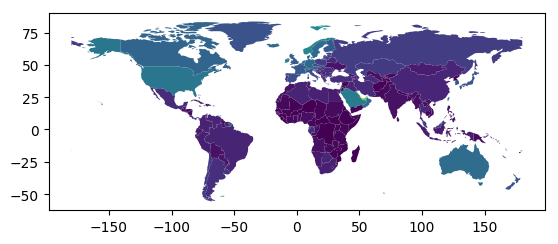

In [5]:
# 去除南极地区
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
# 计算人均gpd
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# 绘图
world.plot(column='gdp_per_cap')

**图例设置**

legend=True即可展示图例。

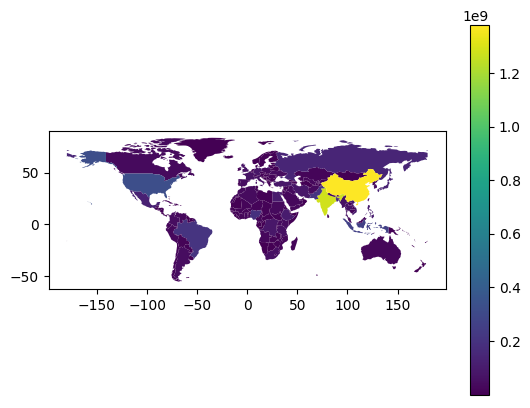

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# 根据人口绘图数绘制
world.plot(column='pop_est', ax=ax, legend=True)

但是我们会发现绘图区域和图例区域不对齐，我们通过mpl_toolkits设置图例轴，并通过cax参数直接控制plot函数的图例绘制。

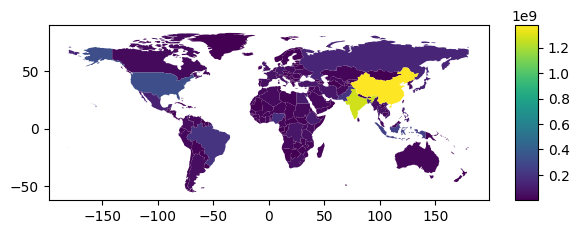

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

# 设置图例，right表示位置，size=5%表示图例宽度，pad表示图例离图片间距
cax = divider.append_axes("right", size="5%", pad=0.2)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

此外我们可以通过legend_kwds设置图例信息和方向，就像matplotlib那样。

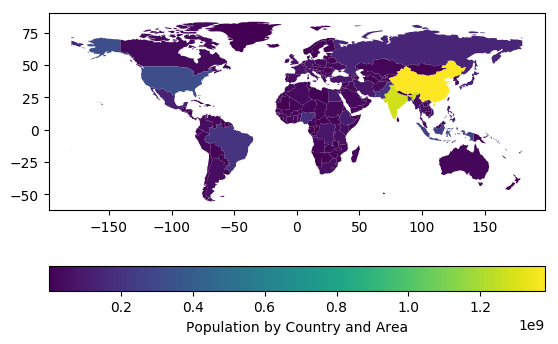

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country and Area",
                        'orientation': "horizontal"})

**颜色设置**

GeoPandas的绘图函数中通过cmap参数设置颜色图，具体cmap参数的设置可以见[matplotlib颜色图选择教程](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py)。

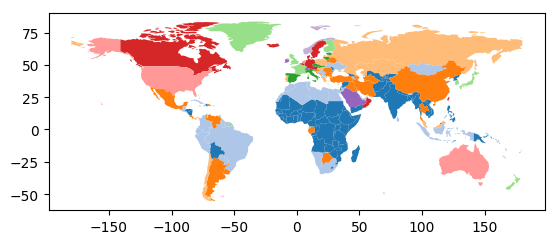

In [9]:
# 设置颜色图为tab20
world.plot(column='gdp_per_cap', cmap='tab20')

如果只想绘制边界，可以调用boundary属性进行绘制。

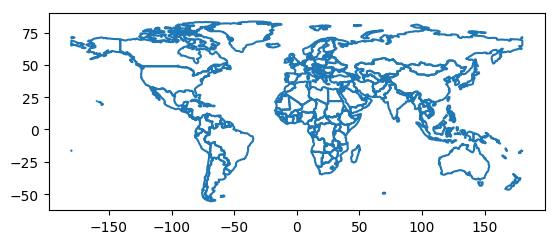

In [10]:
world.boundary.plot()

**缺失数据绘制**

当绘制项某些地图的数据缺失时，GeoPandas会自动放弃这些区域数据的绘制。如下所示。将Africa地区的gdp_per_cap数据设置为确实，那么将不在地图上绘制Africa地区的图形。

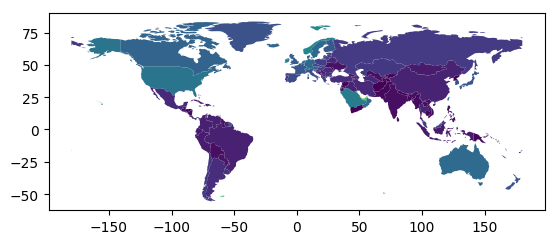

In [11]:
import numpy as np

world.loc[world[world.continent=="Africa"].index, 'gdp_per_cap'] = np.nan
world.plot(column='gdp_per_cap')

如果我们想要在地图上展示缺失值的地区，可以通过missing_kwds设置相应的参数。如下所示：

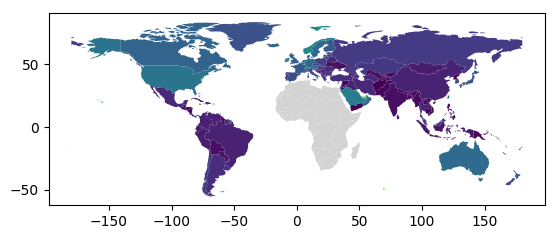

In [12]:
# 将缺失值地区颜色设置为lightgrey
world.plot(column='gdp_per_cap', missing_kwds={'color': 'lightgrey'})

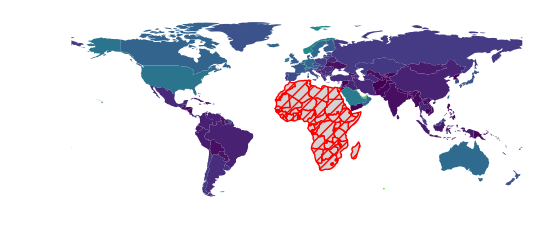

In [13]:
# 更复杂的例子，hatch表示内部图像样式
ax = world.plot(column='gdp_per_cap', missing_kwds={'color': 'lightgrey','edgecolor':'red',"hatch": "///","label": "Missing values"})
# 不显示坐标轴
ax.set_axis_off();

**图层设置**

当我们需要叠加多张地图或多个数据的结果，则需要用到地图的图层。GeoPandas提供了两种方式进行图层设置，但是要注意的是在合并地图之前，始终确保它们共享一个共同的坐标参考系crs。如将world地图和cities地图合并绘制。

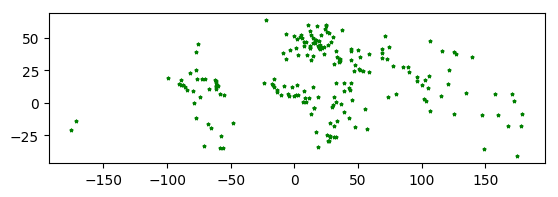

In [14]:
# 以world数据集为准，对齐crs
cities.plot(marker='*', color='green', markersize=5)
cities = cities.to_crs(world.crs)

第一种方式最为简单，直接通过ax参数控制绘图轴来实现图层叠加。

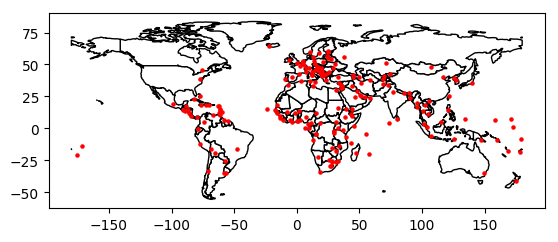

In [15]:
# base为绘图轴
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

第二种方式最为灵活，即通过matplotlib控制绘图。如果想要绘制更加美观的地图，这种方式更加推荐，但是需要了解matplotlib的使用。

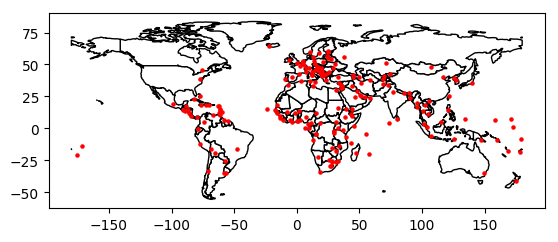

In [16]:
import matplotlib.pyplot as plt


# 设置绘图轴
fig, ax = plt.subplots()
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

**图层顺序控制**

如果我们需要控制地图图层的展示顺序，即哪张图片显示在前。一种办法是通过绘图顺序设置，后绘制的数据的图层顺序越靠上。一种是通过zorder参数设置图层顺序，zorder值越大，表示图层顺序越靠上。如下所示：

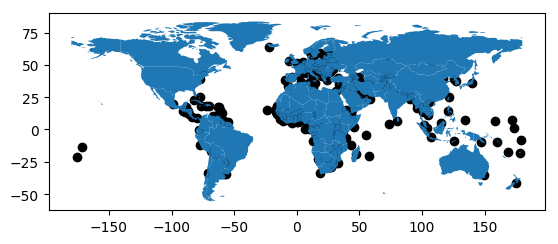

In [17]:
# cities先绘制，则图层顺序更靠下，导致一些数据点被world图层遮盖。
ax = cities.plot(color='k')

world.plot(ax=ax);

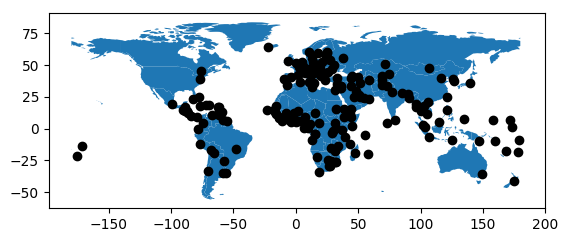

In [18]:
# 调整绘图顺序，完整显示cities数据点
ax = world.plot()

cities.plot(ax=ax,color='k')

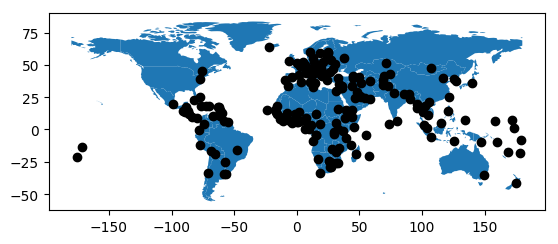

In [19]:
# 通过zorder参数设置图层顺序，完整显示cities数据点
ax = cities.plot(color='k',zorder=2)

world.plot(ax=ax,zorder=1)

**Pandas Plots**

GeoPandas的Plot函数还允许设置kind参数绘制不同类型的图形，kind默认为geo（地图），其他可选参数与pandas默认提供的绘图函数一致。pandas默认提供的绘图函数见：[Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)。


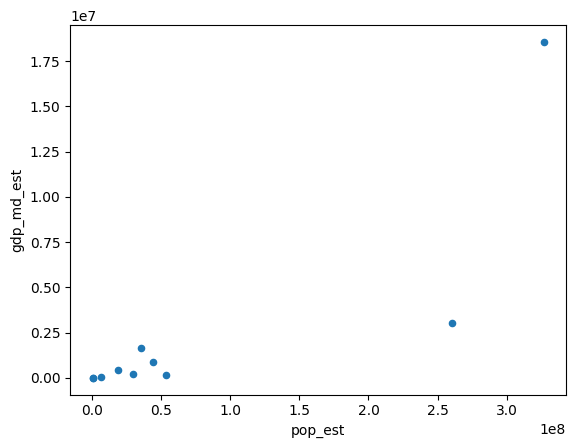

In [20]:
gdf = world.head(10)

gdf.plot(kind='scatter', x="pop_est", y="gdp_md_est")

## 1.2 绘图实例之中国地图绘制


该实例主要参考：

+ [基于geopandas的空间数据分析之基础可视化](https://www.cnblogs.com/feffery/p/12361421.html)
+ [geopandas 中国地图绘制](https://cloud.tencent.com/developer/article/1790603)

**1 读取地图数据**

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取中国地图数据，数据来自DataV.GeoAtlas，将其投影到EPSG:4573
data = gpd.read_file('https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json').to_crs('EPSG:4573')
# 中国有34个省级行政区，最后一条数据为南海九段线
data.shape

(35, 8)

In [22]:
# 保存各个省级行政区的面积，单位万平方公里
data['area'] = data.area/1e6/1e4
# 中国疆域总面积，和官方数据会有差距
data['area'].sum()

989.1500769770855

In [23]:
# 查看最后五条数据
data.tail()

,adcode,name,adchar,childrenNum,level,parent,subFeatureIndex,geometry,area
30,650000,新疆维吾尔自治区,NaN,24.0,province,{'adcode': 100000},30.0,"MULTIPOLYGON (((17794320.693 4768675.631, 1779...",175.796459
31,710000,台湾省,NaN,0.0,province,{'adcode': 100000},31.0,"MULTIPOLYGON (((20103629.026 2566628.808, 2011...",4.090259
32,810000,香港特别行政区,NaN,18.0,province,{'adcode': 100000},32.0,"MULTIPOLYGON (((19432072.340 2517924.724, 1942...",0.125928
33,820000,澳门特别行政区,NaN,8.0,province,{'adcode': 100000},33.0,"MULTIPOLYGON (((19385068.278 2470740.132, 1939...",0.004702
34,100000_JD,,JD,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((20309263.208 2708129.155, 2032...",0.280824


In [24]:
# 拆分数据
nine_dotted_line = data.iloc[-1]
data = data[:-1]
nine_dotted_line

adcode                                                     100000_JD
name                                                                
adchar                                                            JD
childrenNum                                                      NaN
level                                                            NaN
parent                                                           NaN
subFeatureIndex                                                  NaN
geometry           MULTIPOLYGON (((20309263.208229765 2708129.154...
area                                                        0.280824
Name: 34, dtype: object

**2 地图绘制**

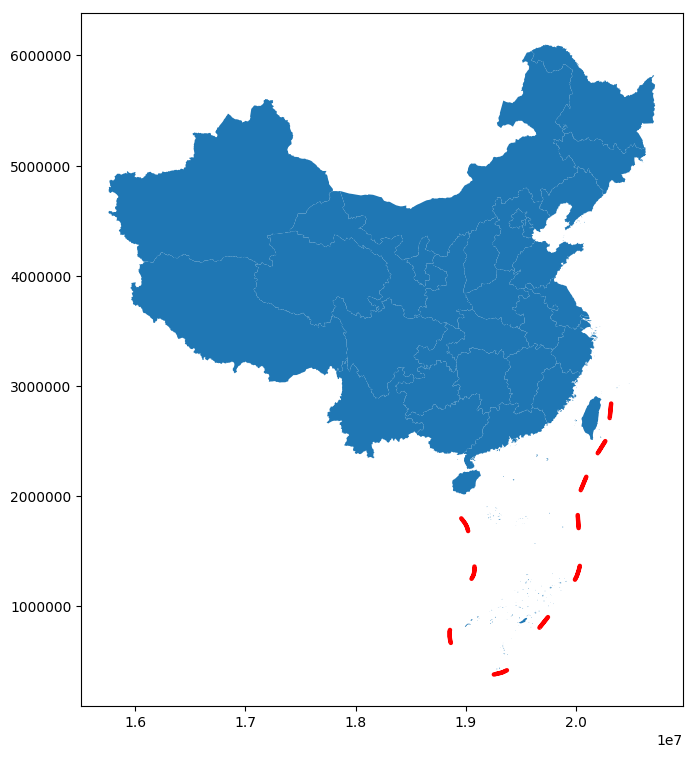

In [25]:
# 创建画布matplotlib
fig, ax = plt.subplots(figsize=(12, 9))
# 绘制主要区域
ax = data.plot(ax=ax)
# 绘制九段线
ax = gpd.GeoSeries(nine_dotted_line.geometry).plot(ax=ax,edgecolor='red',linewidth=3)
# 保存结果
fig.savefig('res.png', dpi=300, bbox_inches='tight')

**3 绘图自定义**

(15508157.566510478, 20969512.421140186, 92287.20109282521, 6384866.68627745)

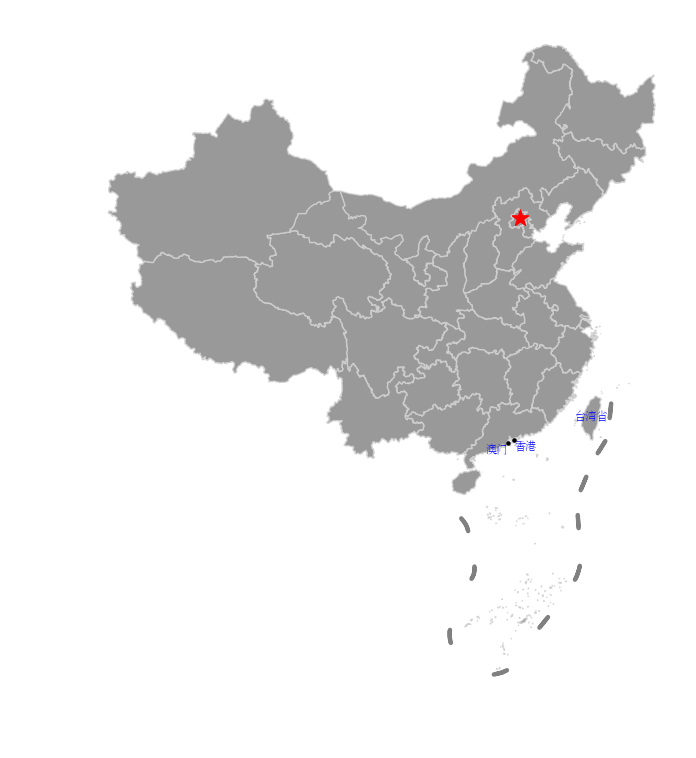

In [26]:
# 创建画布matplotlib
fig, ax = plt.subplots(figsize=(12, 9))
# 绘制主要区域
ax = data.plot(ax=ax,facecolor='grey',edgecolor='lightgrey',alpha=0.8,linewidth=1)
# 绘制九段线
ax = gpd.GeoSeries(nine_dotted_line.geometry).plot(ax=ax,edgecolor='grey',linewidth=3)
# 强调首都
ax = data[data.name=="北京市"].representative_point().plot(ax=ax, facecolor='red',marker='*', markersize=150) 

# 强调港澳台
# 设置字体
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "blue",'weight': 'bold'}
for index in data[data.adcode.isin(['710000','810000','820000'])].index:
    if data.iloc[index]['name'] == "台湾省":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "台湾省"
        ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
    elif data.iloc[index]['name'] == "香港特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "香港"
        ax.text(x, y, name, ha="left", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)
    elif data.iloc[index]['name'] == "澳门特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "澳门"
        ax.text(x, y, name, ha="right", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)

# 移除坐标轴
ax.axis('off')

**4 图例设置**

这里采用单独绘制图例的方式来创建图例，需要对matplotlib使用有一定的了解。

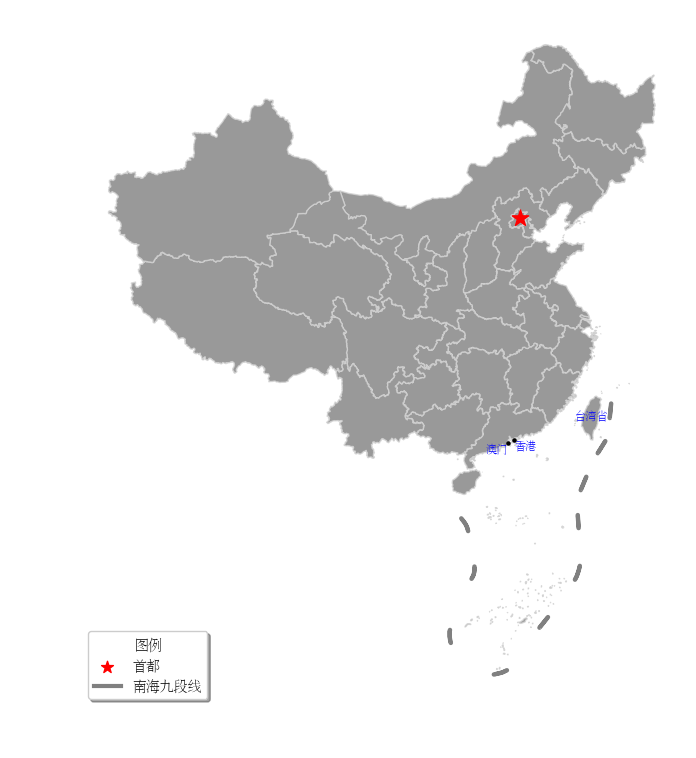

In [27]:
# 创建画布matplotlib
fig, ax = plt.subplots(figsize=(12, 9))
# 绘制主要区域
ax = data.plot(ax=ax,facecolor='grey',edgecolor='lightgrey',alpha=0.8,linewidth=1)
# 绘制九段线
ax = gpd.GeoSeries(nine_dotted_line.geometry).plot(ax=ax,edgecolor='grey',linewidth=3)
# 强调首都
ax = data[data.name=="北京市"].representative_point().plot(ax=ax, facecolor='red',marker='*', markersize=150) 

# 强调港澳台
# 设置字体
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "blue",'weight': 'bold'}
# 这一段代码可能因为不同matplotlib版本出现不同结果
for index in data[data.adcode.isin(['710000','810000','820000'])].index:
    if data.iloc[index]['name'] == "台湾省":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "台湾省"
        ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
    elif data.iloc[index]['name'] == "香港特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "香港"
        ax.text(x, y, name, ha="left", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)
    elif data.iloc[index]['name'] == "澳门特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "澳门"
        ax.text(x, y, name, ha="right", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)

# 移除坐标轴
ax.axis('off')

# 单独绘制图例
plt.rcParams["font.family"] = 'FZSongYi-Z13S'
ax.scatter([], [], c='red', s=80,  marker='*', label='首都')
ax.plot([], [], c='grey',linewidth=3, label='南海九段线') 
# 设置图例顺序
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="图例",frameon=True, shadow=True, loc="lower left",fontsize=10)
# ax.legend(title="图例",frameon=True, shadow=True, loc="lower left",fontsize=10)

**5 小地图绘制**

在很多中国地图中，南海诸岛区域都是在右下角的小地图单独绘制。在GeoPandas中想要实现这一功能，可以通过matplotlib的add_axes函数实现。add_axes主要功能为为新增绘图子区域，该区域可以位于画布中任意区域，且可设置任意大小。add_axes输入参数为(left, bottom, width, height)，left, bottom表示相对画布的比例坐标，width和height表示相对画布的比例长宽。

这种绘图方式非常不专业，也不推荐，建议只是学习使用思路。具体使用看如下代码。

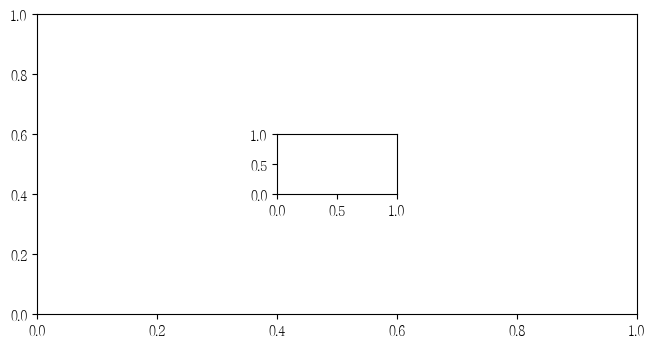

In [28]:
# 创建画布
fig = plt.figure(figsize=(6,3))
# 创建一个填充整个画布的子图
ax = fig.add_axes((0,0,1,1))
# 从画布宽40%，高40%处绘制子图 
ax_child = fig.add_axes((0.4,0.4,0.2,0.2))

具体添加小地图首先确定中国大陆区域范围和南海范围，然后分开绘制。


In [29]:
from shapely.geometry import Point

# 设中国大陆区域范围和南海范围，估计得到
bound = gpd.GeoDataFrame({
    'x': [80, 140, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})
bound.geometry = bound.apply(lambda row: Point([row['x'], row['y']]), axis=1)
# 初始化CRS
bound.crs = 'EPSG:4326'
bound = bound.to_crs('EPSG:4573')
bound

,x,y,geometry
0,80.0,15.0,POINT (15734050.166 1822879.627)
1,140.0,50.0,POINT (20972709.719 6154280.305)
2,106.5,2.8,POINT (18666803.134 309722.667)
3,123.0,24.5,POINT (20344370.888 2833592.614)


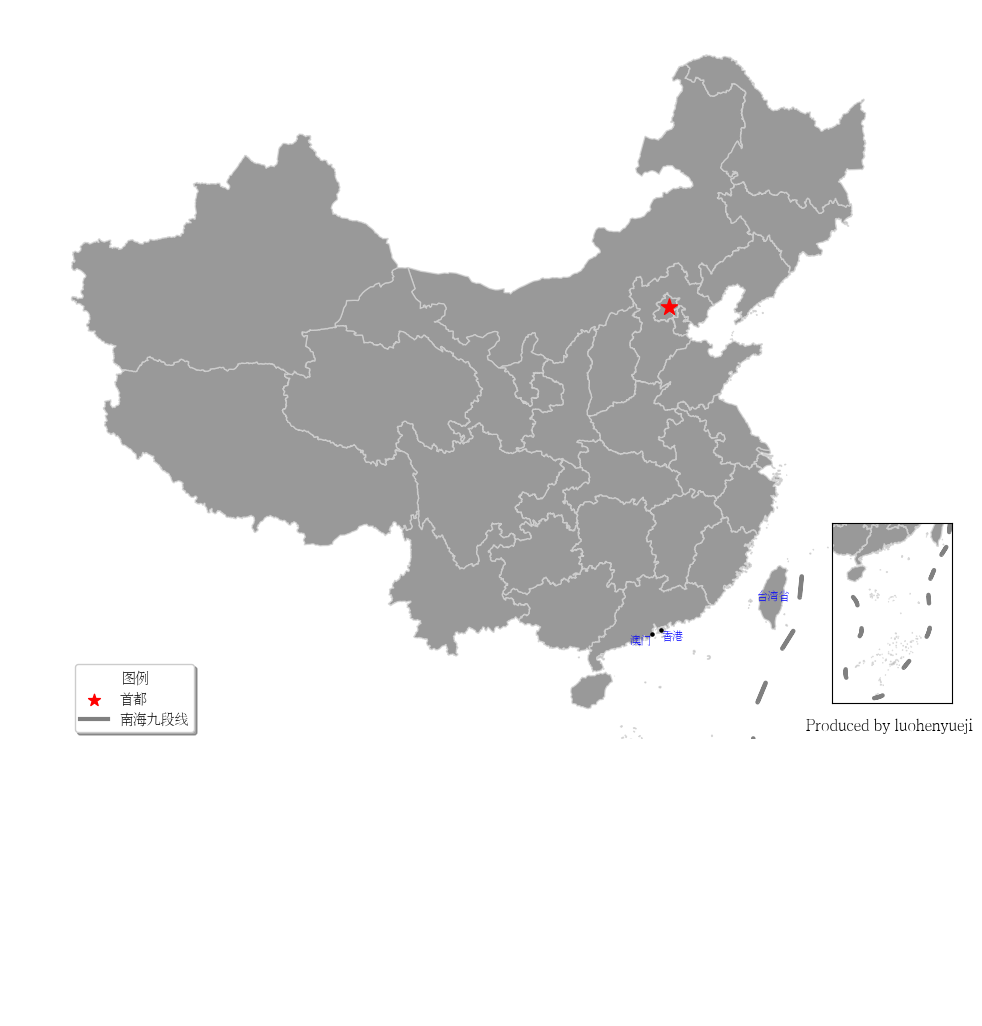

In [30]:
# 创建画布matplotlib
fig, ax = plt.subplots(figsize=(12, 9))
# 绘制主要区域
ax = data.plot(ax=ax,facecolor='grey',edgecolor='lightgrey',alpha=0.8,linewidth=1)
# 绘制九段线
ax = gpd.GeoSeries(nine_dotted_line.geometry).plot(ax=ax,edgecolor='grey',linewidth=3)
# 强调首都
ax = data[data.name=="北京市"].representative_point().plot(ax=ax, facecolor='red',marker='*', markersize=150) 

# 强调港澳台
# 设置字体
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "blue",'weight': 'bold'}
# 这一段代码可能因为不同matplotlib版本出现不同结果
for index in data[data.adcode.isin(['710000','810000','820000'])].index:
    if data.iloc[index]['name'] == "台湾省":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "台湾省"
        ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
    elif data.iloc[index]['name'] == "香港特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "香港"
        ax.text(x, y, name, ha="left", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)
    elif data.iloc[index]['name'] == "澳门特别行政区":
        x = data.iloc[index].geometry.centroid.x
        y = data.iloc[index].geometry.centroid.y
        name = "澳门"
        ax.text(x, y, name, ha="right", va="top", fontdict=fontdict)
        gpd.GeoSeries(data.iloc[index].geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)

# 设置大陆区域范围
ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

# 移除坐标轴
ax.axis('off')

# 单独绘制图例
plt.rcParams["font.family"] = 'FZSongYi-Z13S'
ax.scatter([], [], c='red', s=80,  marker='*', label='首都')
ax.plot([], [], c='grey',linewidth=3, label='南海九段线') 
# 设置图例顺序
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="图例",frameon=True, shadow=True, loc="lower left",fontsize=10)
# ax.legend(title="图例",frameon=True, shadow=True, loc="lower left",fontsize=10)

# 创建南海插图对应的子图，调整这些参数以调整地图位置
ax_child = fig.add_axes([0.75, 0.15, 0.2, 0.2])
ax_child = data.plot(ax=ax_child,facecolor='grey',edgecolor='lightgrey',alpha=0.8,linewidth=1)
# 绘制九段线
ax_child = gpd.GeoSeries(nine_dotted_line.geometry).plot(ax=ax_child,edgecolor='grey',linewidth=3)

# 设置子图显示范围
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)
ax_child.text(0.98,0.02,'Produced by luohenyueji',transform = ax.transAxes,
        ha='center', va='center',fontsize = 12,color='black')
# 移除子图坐标轴
ax_child.set_xticks([])
ax_child.set_yticks([])

fig.savefig('res.png', dpi=300, bbox_inches='tight')

# 2 分层设色

## 2.1 分层设色基本介绍

如下代码所示，绘制江苏省地级市GDP地图。

In [31]:
# 读取2019江苏省各市GDP数据

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.family"] = 'FZSongYi-Z13S'
# 数据来自互联网
gdp = pd.read_csv("2022江苏省各市GDP.csv")
gdp

,排行,地级市,2022年GDP（亿元）
0,1,苏州市,23958.3
1,2,南京市,16907.9
2,3,无锡市,14850.8
3,4,南通市,11379.6
4,5,常州市,9550.1
5,6,徐州市,8457.8
6,7,盐城市,7079.8
7,8,扬州市,6696.4
8,9,泰州市,6401.8
9,10,镇江市,5017.0


In [32]:
# 读取江苏地图数据，数据来自DataV.GeoAtlas，将其投影到EPSG:4573
data = gpd.read_file('https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json').to_crs('EPSG:4573')
# 合并数据
data = data.join(gdp.set_index('地级市')["2022年GDP（亿元）"],on='name')
# 修改列名
data.rename(columns={'2022年GDP（亿元）':'GDP'},inplace=True)
data.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,GDP
0,320100,南京市,11,city,{'adcode': 320000},0,"MULTIPOLYGON (((19828216.260 3681802.361, 1982...",16907.9
1,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((19892555.472 3541293.638, 1989...",14850.8
2,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((19736418.457 3894748.096, 1973...",8457.8
3,320400,常州市,6,city,{'adcode': 320000},3,"MULTIPOLYGON (((19927182.917 3638819.801, 1992...",9550.1
4,320500,苏州市,9,city,{'adcode': 320000},4,"MULTIPOLYGON (((19929872.531 3547724.116, 1993...",23958.3


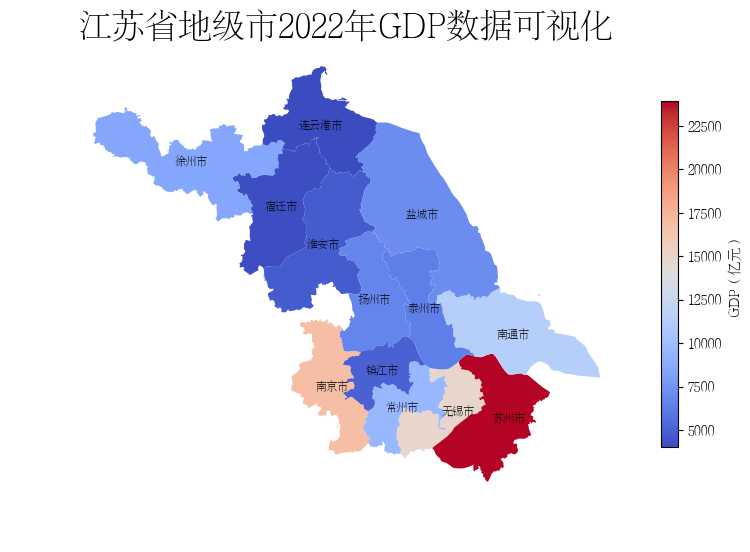

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))

# legend_kwds设置matplotlib的legend参数
data.plot(ax=ax,column='GDP', cmap='coolwarm', legend=True,legend_kwds={'label': "GDP（亿元）", 'shrink':0.5})
ax.axis('off')

# 设置
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "black",'weight': 'bold'}

# 设置标题
ax.set_title('江苏省地级市2022年GDP数据可视化', fontsize=24) 
for index in data.index:
    x = data.iloc[index].geometry.centroid.x
    y = data.iloc[index].geometry.centroid.y
    name = data.iloc[index]["name"]
    if name in ["苏州市","无锡市"]:
        x = x*1.001
    ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
# 保存图片
fig.savefig('res.png', dpi=300, bbox_inches='tight')

可以看到在上述地图中，由于苏州市的数值太大，其他数据被压缩到浅色区域，无法有效展示数据分布。需要使用地图分层设色来更好地展示数据。地图分层设色是一种常见的地图可视化方式，它可以将地图上的数据按照不同的分类进行分层，并对每一层数据进行不同的颜色设定，以便更加直观地展现地理空间数据的分布情况和特征。
在本文通过Python模块mapclassify用于分层设色和数据可视化。使用mapclassify之前需要输入以下命令安装相关模块：

> pip install mapclassify

mapclassify官方仓库见：[mapclassify](https://github.com/pysal/mapclassify)。mapclassify提供了多种分组方法，可以帮助我们更好地理解数据的分布情况，mapclassify提供的方法包括：

- `BoxPlot`: 基于箱线图的分类方法。这种分类方法适用于数据分布比较规律的情况。
- `EqualInterval`: 等距离分类方法。这种分类方法将数据划分为等距离的若干区间。适用于数据分布比较均匀的情况。
- `FisherJenks`: 基于Fisher-Jenks算法的分类方法。这种分类方法将数据划分为若干区间，使得每个区间内部的差异最小，不同区间之间的差异最大。适用于数据分布比较不规律的情况。
- `HeadTailBreaks`: 基于Head-Tail算法的分类方法。这种分类方法将给定的数据集分为两部分：头部和尾部。头部通常包含出现频率最高的值，而尾部包含出现频率较低的值。适用于识别数据集中的异常值和离群值。
- `JenksCaspall`: 基于Jenks-Caspall算法的分类方法。这种分类方法根据数据中发现的自然分组将数据集划分为类。适用于需要将数据分类为几个具有明显含义的区间的情况。
- `JenksCaspallForced`: 强制基于Jenks-Caspall算法的分类方法。与JenksCaspall算法类似，但是它对区间的数量和大小有更强的控制力。适用于需要精确控制区间数量和大小的情况。
- `JenksCaspallSampled`: 采样基于Jenks-Caspall算法的分类方法。该方法对数据进行采样，然后使用Jenks-Caspall算法对采样后的数据进行分类，适用于数据量比较大的情况。
- `MaxP`: 基于最大界限的分类方法。这种分类方法将数据划分为几个区间，使得不同区间之间的差异最大。适用于需要将数据分类为几个具有明显差异的区间的情况。
- `MaximumBreaks`: 基于最大间隔的分类方法。这种分类方法与MaxP算法类似，但是它更加注重区间的可理解性。适用于需要将数据分类为几个具有明显含义的区间的情况。
- `NaturalBreaks`: 基于自然间隔的分类方法。这种分类方法将数据划分为几个区间，使得每个区间内部的差异最小，不同区间之间的差异最大。适用于数据分布比较不规律的情况
- `Quantiles`: 基于分位数的分类方法。
- `Percentiles`: 基于百分位数的分类方法。
- `StdMean`: 基于标准差分组的分类方法。
- `UserDefined`: 基于自定义分组的分类方法。

关于以上常用方法的具体介绍可以看看[基于geopandas的空间数据分析——深入浅出分层设色](https://www.cnblogs.com/feffery/p/12381322.html)。mapclassify对数据进行分类简单使用方法如下：

**示例1**

In [34]:
import mapclassify
# 导入示例数据
y = mapclassify.load_example()
print(type(y))
print(y.mean(),y.min(), y.max())
y.head()

<class 'pandas.core.series.Series'>
125.92810344827588 0.13 4111.45


0    329.92
1      0.42
2      5.90
3     14.03
4      2.78
Name: emp/sq km, dtype: float64

In [35]:
mapclassify.EqualInterval(y)

EqualInterval

     Interval        Count
--------------------------
[   0.13,  822.39] |    57
( 822.39, 1644.66] |     0
(1644.66, 2466.92] |     0
(2466.92, 3289.19] |     0
(3289.19, 4111.45] |     1

**示例2**

In [36]:
y = [1,2,3,4,5,6,7,8,9,0]
# 分为四个区间
mapclassify.JenksCaspall(y, k=4)

JenksCaspall

  Interval     Count
--------------------
[0.00, 2.00] |     3
(2.00, 4.00] |     2
(4.00, 6.00] |     2
(6.00, 9.00] |     3

**示例3**

In [37]:
y = [1,2,3,4,5,6,7,8,9,0]
# 自定义区间
mapclassify.UserDefined(y, bins=[5, 8, 9])

UserDefined

  Interval     Count
--------------------
[0.00, 5.00] |     6
(5.00, 8.00] |     3
(8.00, 9.00] |     1

**示例4**

In [38]:
import mapclassify 
import pandas
from numpy import linspace as lsp
demo = [lsp(3,8,num=10), lsp(10, 0, num=10), lsp(-5, 15, num=10)]
demo = pandas.DataFrame(demo).T
demo.head()

,0,1,2
0,3.000000,10.000000,-5.000000
1,3.555556,8.888889,-2.777778
2,4.111111,7.777778,-0.555556
3,4.666667,6.666667,1.666667
4,5.222222,5.555556,3.888889


In [39]:
# 使用apply函数应用分层，rolling表示是否进行滑动窗口计算以消除随机波动
demo.apply(mapclassify.Quantiles.make(rolling=True)).head()

,0,1,2
0,0,4,0
1,0,4,0
2,1,4,0
3,1,3,0
4,2,2,1


## 2.2 绘图实例之用于地图的分层设色

**方法1**

GeoPandas中分层设色可以通过plot函数中的scheme参数和k参数设置数据分层方式和分层类别数。如下所示，通过JenksCaspall将GDP数据分为4级，可以直观看到GDP数据在第一梯队的城市有哪些。

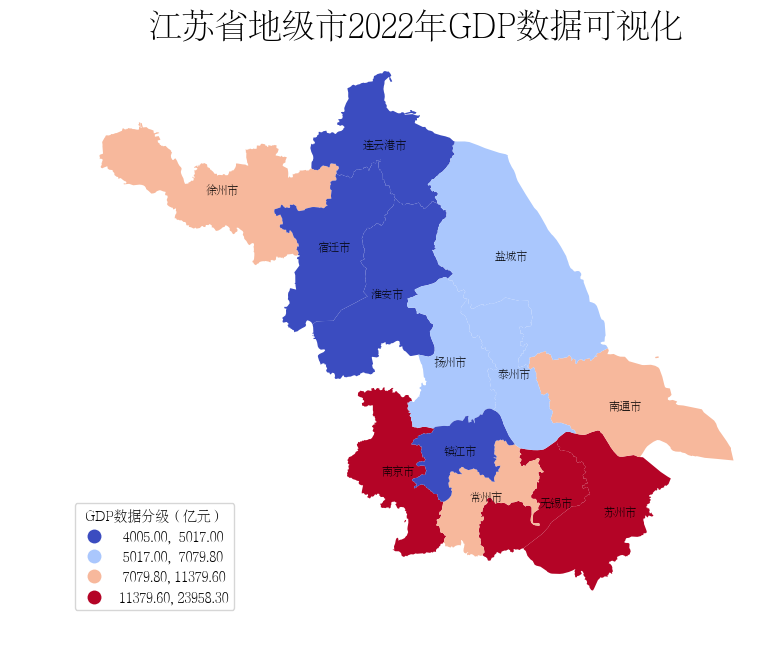

In [40]:
fig, ax = plt.subplots(figsize=(9, 9))

# 使用分层设色后,legend_kwds要进行相应修改
data.plot(ax=ax,column='GDP', cmap='coolwarm', legend=True,scheme='JenksCaspall',k=4,legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': 'GDP数据分级（亿元）',
                                                 })
ax.axis('off')

# 设置
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "black",'weight': 'bold'}

# 设置标题
ax.set_title('江苏省地级市2022年GDP数据可视化', fontsize=24) 
for index in data.index:
    x = data.iloc[index].geometry.centroid.x
    y = data.iloc[index].geometry.centroid.y
    name = data.iloc[index]["name"]
    if name in ["苏州市","无锡市"]:
        x = x*1.001
    ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
# 保存图片
fig.savefig('res.png', dpi=300, bbox_inches='tight')

**方法2**

在GeoPandas中也可以通过mapclassify直接处理数据，生成新的数据列进行展示。通过该种方式可以看到，苏州和南京的GDP领先于其他地级市。

In [41]:
# 创建分类器
classifier = mapclassify.HeadTailBreaks(data['GDP'])
classifier

HeadTailBreaks

      Interval         Count
----------------------------
[ 4005.00,  9473.76] |     8
( 9473.76, 15329.34] |     3
(15329.34, 20433.10] |     1
(20433.10, 23958.30] |     1

In [42]:
# 赋值数据
data['GDP_class'] = data['GDP'].apply(classifier)
data['GDP_class'] = data['GDP_class'].apply(lambda x : int(x))
data.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,GDP,GDP_class
0,320100,南京市,11,city,{'adcode': 320000},0,"MULTIPOLYGON (((19828216.260 3681802.361, 1982...",16907.9,2
1,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((19892555.472 3541293.638, 1989...",14850.8,1
2,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((19736418.457 3894748.096, 1973...",8457.8,0
3,320400,常州市,6,city,{'adcode': 320000},3,"MULTIPOLYGON (((19927182.917 3638819.801, 1992...",9550.1,1
4,320500,苏州市,9,city,{'adcode': 320000},4,"MULTIPOLYGON (((19929872.531 3547724.116, 1993...",23958.3,3


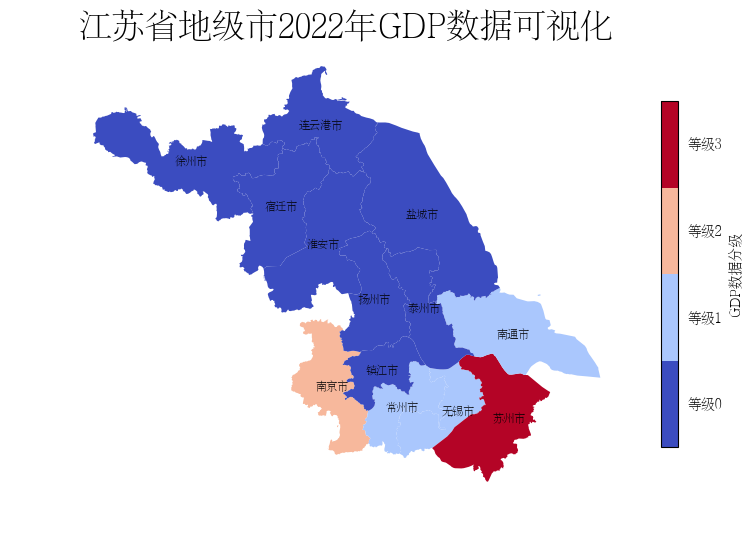

In [43]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9, 9))

# 设置分层颜色条
cmap = plt.cm.get_cmap('coolwarm', len(set(data['GDP_class'])))
# vmax和vmin设置是为了让等级值居中
data.plot(ax=ax,column='GDP_class', cmap=cmap, legend=False,vmin=-0.5,vmax=3.5)
ax.axis('off')
# 设置Colorbar的刻度
cbar = ax.get_figure().colorbar(ax.collections[0],shrink=0.5)
cbar.set_ticks([0,1,2,3])
cbar.set_label('GDP数据分级')
cbar.set_ticklabels(['等级0','等级1','等级2','等级3'])
# 隐藏刻度线
ticks = cbar.ax.get_yaxis().get_major_ticks()
for tick in ticks:
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)


# 设置
fontdict = {'family':'FZSongYi-Z13S', 'size':8, 'color': "black",'weight': 'bold'}

# 设置标题
ax.set_title('江苏省地级市2022年GDP数据可视化', fontsize=24) 
for index in data.index:
    x = data.iloc[index].geometry.centroid.x
    y = data.iloc[index].geometry.centroid.y
    name = data.iloc[index]["name"]
    if name in ["苏州市","无锡市"]:
        x = x*1.001
    ax.text(x, y, name, ha="center", va="center", fontdict=fontdict)
# 保存图片
fig.savefig('res.png', dpi=300, bbox_inches='tight')

**方法3**

分层设色不仅可以设置各区域的颜色，也可以设置各区域的填充图案

In [44]:
# 创建分类器
classifier = mapclassify.MaximumBreaks(data['GDP'], k=3)
classifier

MaximumBreaks

      Interval         Count
----------------------------
[ 4005.00, 13115.20] |    10
(13115.20, 20433.10] |     2
(20433.10, 23958.30] |     1

In [45]:
# 赋值数据
data['GDP_class'] = data['GDP'].apply(classifier)
data['GDP_class'] = data['GDP_class'].apply(lambda x : int(x))
data.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry,GDP,GDP_class
0,320100,南京市,11,city,{'adcode': 320000},0,"MULTIPOLYGON (((19828216.260 3681802.361, 1982...",16907.9,1
1,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((19892555.472 3541293.638, 1989...",14850.8,1
2,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((19736418.457 3894748.096, 1973...",8457.8,0
3,320400,常州市,6,city,{'adcode': 320000},3,"MULTIPOLYGON (((19927182.917 3638819.801, 1992...",9550.1,0
4,320500,苏州市,9,city,{'adcode': 320000},4,"MULTIPOLYGON (((19929872.531 3547724.116, 1993...",23958.3,2


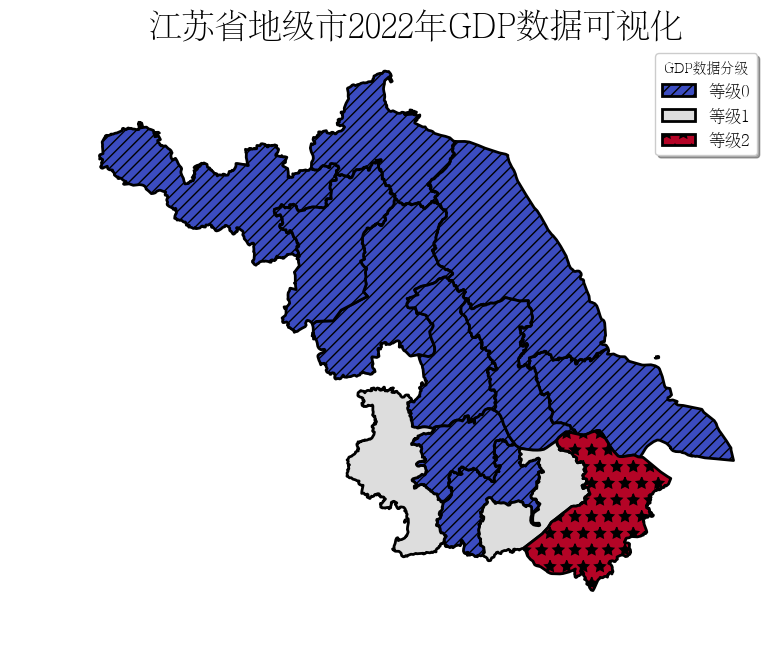

In [53]:
import matplotlib.patches as mpatches

# 设置图案列表
patterns = ["///", "",  "*", "\\\\",".", "o",  "O",]
cmap = plt.cm.get_cmap('coolwarm', len(set(data['GDP_class'])))
color_list = cmap([0,1,2])
fig, ax = plt.subplots(figsize=(9, 9))
# 自定义图示
legend_list = []

# 按层次设置legend
for i in set(data['GDP_class']):
    tmp = data[data['GDP_class']==i]
    tmp.plot(ax=ax,column='GDP_class', legend=False,hatch=patterns[i],edgecolor='black',color=color_list[i], linestyle='-',linewidth=2)
    legend_list.append(
        mpatches.Patch(facecolor=color_list[i], edgecolor='black',linestyle='-', linewidth=2,hatch=patterns[i], label='等级{}'.format(i))
    )
ax.axis('off')
# 设置标题
ax.set_title('江苏省地级市2022年GDP数据可视化', fontsize=24) 

# 自定义图示
ax.legend(handles = legend_list, loc='best', fontsize=12, title='GDP数据分级', shadow=True)

# 保存图片
fig.savefig('res.png', dpi=300, bbox_inches='tight')

# 3 参考

+ [GeoPandas](https://github.com/geopandas/geopandas)
+ [GeoPandas-doc](https://geopandas.org/en/stable/docs.html)
+ [[数据分析与可视化] Python绘制数据地图1-GeoPandas入门指北](https://blog.csdn.net/LuohenYJ/article/details/129596398)
+ [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
+ [基于geopandas的空间数据分析之基础可视化](https://www.cnblogs.com/feffery/p/12361421.html)
+ [geopandas 中国地图绘制](https://cloud.tencent.com/developer/article/1790603)
+ [mapclassify](https://github.com/pysal/mapclassify)
+ [基于geopandas的空间数据分析——深入浅出分层设色](https://www.cnblogs.com/feffery/p/12381322.html)